In [ ]:
# Import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report

from sklearn.ensemble import RandomForestClassifier

import time
import random
%matplotlib inline

# To  see no of column can visible
pd.set_option('display.max_columns',300)

In [ ]:
# Load the data

data=pd.read_csv(r"C:\Users\Anupa\Desktop\Learnby- Machine learning & AI\Statistics & Machine Learning_August 2020\PPT & CODE\Random FOrest\data.csv",index_col=0)

In [77]:
data.head(5)

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_pred_P,P_Rank_RF
SR NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.729524,8
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.071667,5
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.253333,6
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.817857,8
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.202619,6


In [ ]:
data.shape

In [5]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
data.head(2)
data.shape

(569, 31)

In [7]:
# Checking the event rate for dependent variable
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

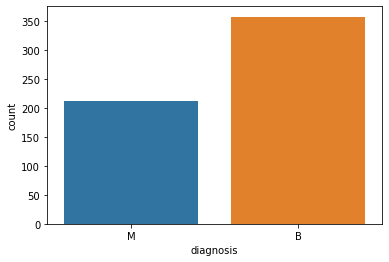

In [8]:
plt.show()
sns.countplot(x="diagnosis",data=data)


# We can seen that this is kind of balance dataset

In [9]:
# Renaming of dependent feature column
data["diagnosis"]=np.where(data["diagnosis"].isin(["M"]),1,0)

In [10]:
data=data.rename(columns={"diagnosis":"Target"})

In [11]:
data["Target"].value_counts()

0    357
1    212
Name: Target, dtype: int64

In [12]:
data["Target"].mean()

0.37258347978910367

In [13]:
# Check for missing value

data.isnull().sum()


# No missing value is present in the dataset

Target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
# Check for the outliers
# spliiting of dependent & independent variable
X=data.drop("Target",axis=1)
Y=data["Target"]

In [15]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
X.quantile([0.01,0.99])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0.01,8.45836,10.9304,53.8276,215.664,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,0.11974,0.410548,0.953248,8.51444,0.003058,0.004705,0.000000,0.000000,0.010547,0.001114,9.2076,15.2008,58.2704,256.192,0.087910,0.050094,0.00000,0.000000,0.176028,0.058580
0.99,24.37160,30.6520,165.7240,1786.600,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,1.29132,2.915440,9.690040,177.68400,0.017258,0.089872,0.122292,0.031194,0.052208,0.012650,30.7628,41.8024,208.3040,2918.160,0.188908,0.778644,0.90238,0.269216,0.486908,0.140628


In [17]:
X=X.clip(upper=X.quantile(0.99),axis=1)
X=X.clip(lower=X.quantile(0.01),axis=1)
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.113362,19.263470,91.889771,651.295227,0.096305,0.104193,0.088369,0.048689,0.181089,0.062729,0.399695,1.209184,2.825931,38.873553,0.006994,0.025329,0.030954,0.011711,0.020460,0.003722,16.252581,25.659471,107.132718,876.073835,0.132252,0.252982,0.270579,0.114480,0.289473,0.083769
std,3.439789,4.192831,23.752853,334.962197,0.013554,0.051881,0.078109,0.038033,0.026530,0.006721,0.244499,0.515955,1.761995,34.697500,0.002732,0.017178,0.023385,0.005798,0.007797,0.002182,4.754601,5.996528,33.020473,548.004368,0.022165,0.151712,0.202652,0.065417,0.058421,0.017097
min,8.458360,10.930400,53.827600,215.664000,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,0.119740,0.410548,0.953248,8.514440,0.003058,0.004705,0.000000,0.000000,0.010547,0.001114,9.207600,15.200800,58.270400,256.192000,0.087910,0.050094,0.000000,0.000000,0.176028,0.058580
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,24.371600,30.652000,165.724000,1786.600000,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,1.291320,2.915440,9.690040,177.684000,0.017258,0.089872,0.122292,0.031194,0.052208,0.012650,30.762800,41.802400,208.304000,2918.160000,0.188908,0.778644,0.902380,0.269216,0.486908,0.140628


In [18]:
# Split the data into Training & Test set
X1=X.values
Y1=Y.values

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20,random_state=40)
                                                                       

In [20]:
# Building a Machine Learning Model using Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(random_state=40)

# Hyper_Parametr Optimization Using GridSearchCV

In [22]:
#Hyper_Parametr Optimization Using GridSearchCV

np.random.seed(40)


start = time.time()

param_dist = {'max_depth':[2,3,4,5,6,7,8],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

from sklearn.model_selection import GridSearchCV,KFold
grid_rf = GridSearchCV(Random_forest,cv=10,param_grid=param_dist,n_jobs=3)

grid_rf.fit(X_train,y_train)
print('Best Parameters using Grid search: \n',grid_rf.best_params_)

end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
Time taken in grid search: 239.67


In [26]:
# Setting the best paramenter which are originated from GRIDSEARCHCV in random forest model

Random_forest.set_params(bootstrap= False, criterion= 'gini', max_depth= 8, max_features= 'auto')


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

# OOB RATE

In [34]:
Random_forest.set_params(oob_score=True,warm_start=False,bootstrap=True)

min_estimators = 20
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    Random_forest.set_params(n_estimators=i)
    Random_forest.fit(X_train,y_train)

    oob_error = 1 - Random_forest.oob_score_
    error_rate[i] = oob_error 

In [37]:
error_rate
oob_series = pd.Series(error_rate)
oob_series

20      0.046154
21      0.048352
22      0.048352
23      0.048352
24      0.046154
          ...   
996     0.035165
997     0.035165
998     0.035165
999     0.035165
1000    0.035165
Length: 981, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 20 to 1000 Trees)')

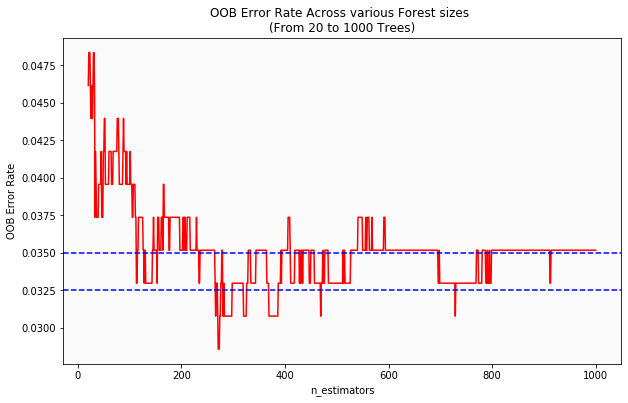

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.0325,color='blue',linestyle='--')
plt.axhline(0.0350,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 20 to 1000 Trees)')

In [72]:
# Now we get all the parameters which provide maximum accuracy
# Random Forest with 700 estimators
Random_forest = RandomForestClassifier(bootstrap=True,
                       criterion='gini', max_depth=8, max_features='auto',oob_score=True, random_state=40,
                       warm_start=False,
                       max_leaf_nodes=20, max_samples=20,
                       min_samples_leaf=2, min_samples_split=4,n_estimators=700,
                       n_jobs=None)
Random_forest_fit=Random_forest.fit(X_train,y_train)
Random_forest_train = Random_forest.score(X_train, y_train)
print("Training score: ",Random_forest_train)
Random_forest_test = Random_forest.score(X_test, y_test)
print("Testing score: ",Random_forest_test)

Training score:  0.9472527472527472
Testing score:  0.9473684210526315


# Prediction

In [73]:
y_pred=Random_forest_fit.predict(X_test)
y_pred_prob=Random_forest_fit.predict_proba(X_test)[:,1]

print(y_pred)
print()
print(y_pred_prob)

[0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0]

[0.03928571 0.72952381 0.07166667 0.25333333 0.81785714 0.20261905
 0.13761905 0.12       0.58880952 0.02738095 0.95642857 0.08261905
 0.2347619  0.01571429 0.95357143 0.01214286 0.04071429 0.07380952
 0.0347619  0.0097619  0.0302381  0.9647619  0.25452381 0.9252381
 0.94952381 0.76404762 0.86333333 0.96809524 0.07238095 0.03095238
 0.06119048 0.97714286 0.92452381 0.06452381 0.02833333 0.34880952
 0.01690476 0.62833333 0.0202381  0.18095238 0.93309524 0.01619048
 0.01833333 0.11785714 0.96380952 0.55333333 0.01       0.31285714
 0.95690476 0.20642857 0.97642857 0.01714286 0.05595238 0.06738095
 0.41142857 0.015      0.78380952 0.42547619 0.7502381  0.11642857
 0.04166667 0.5497619  0.04642857 0.16333333 0.02428571 0.87238095
 0.72119048 0.81357143 0.01880

# Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[72  3]
 [ 3 36]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [61]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision",metrics.precision_score(y_test,y_pred))

print("Recall",metrics.recall_score(y_test,y_pred))

Accuracy: 0.9473684210526315
Precision 0.9230769230769231
Recall 0.9230769230769231


# Variable Importance

In [71]:
import pandas as pd
feature_importances=pd.DataFrame(Random_forest.feature_importances_,
                                 index=X.columns,
                                 columns=['Variable importance']).sort_values('Variable importance',ascending=False)
feature_importances

,Variable importance
area_worst,0.112819
concave points_mean,0.105673
perimeter_worst,0.104423
concave points_worst,0.099968
radius_worst,0.071708
area_mean,0.067020
concavity_worst,0.057454
perimeter_mean,0.051431
radius_mean,0.049831
area_se,0.048175


# ROC-AUC CURVE

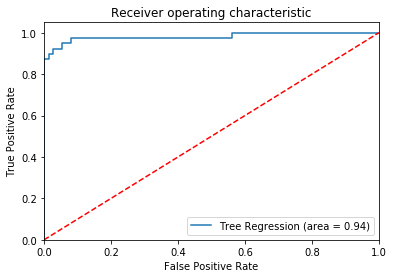

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

tree_roc_auc=roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()

plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Event Capture Rate By Model


In [75]:

data['y_pred_P']=pd.DataFrame(y_pred_prob)
data['P_Rank_RF']=pd.qcut(data['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=data.groupby('P_Rank_RF')['Target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed




,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile
0,10,12,0.583333,7.0,7.0,0.033019,0.033019,0.021090,0.021090,1
1,9,11,0.727273,8.0,15.0,0.037736,0.070755,0.019332,0.040422,2
2,8,11,0.727273,8.0,23.0,0.037736,0.108491,0.019332,0.059754,3
3,7,11,0.727273,8.0,31.0,0.037736,0.146226,0.019332,0.079086,4
4,6,11,0.545455,6.0,37.0,0.028302,0.174528,0.019332,0.098418,5
5,5,12,0.833333,10.0,47.0,0.047170,0.221698,0.021090,0.119508,6
6,4,11,0.454545,5.0,52.0,0.023585,0.245283,0.019332,0.138840,7
7,3,11,0.363636,4.0,56.0,0.018868,0.264151,0.019332,0.158172,8
8,2,11,0.363636,4.0,60.0,0.018868,0.283019,0.019332,0.177504,9
9,1,12,0.666667,8.0,68.0,0.037736,0.320755,0.021090,0.198594,10


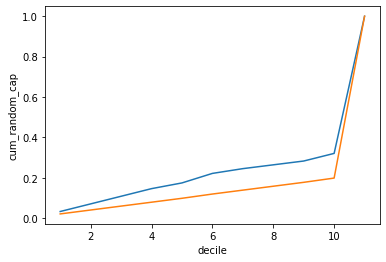

In [76]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)